In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
random_bfs = pd.read_csv('../evaluation/bfs-vs-dfs-bfs-random-order.csv')
random_bfs.set_index('Unnamed: 0', inplace=True)
random_dfs = pd.read_csv('../evaluation/bfs-vs-dfs-dfs-random-order.csv')
random_dfs.set_index('Unnamed: 0', inplace=True)
random_order = pd.read_csv('../evaluation/bfs-vs-dfs-random-order.csv')
random_order.set_index('Unnamed: 0', inplace=True)
random_tree = pd.read_csv('../evaluation/bfs-vs-dfs-random-tree-order.csv')
random_tree.set_index('Unnamed: 0', inplace=True)
francesco_dfs = pd.read_csv('../evaluation/bfs-vs-dfs.csv')
francesco_dfs.set_index('Unnamed: 0', inplace=True)
francesco_bfs = pd.read_csv('../evaluation/bfs-vs-dfs-bfs-order.csv')
francesco_bfs.set_index('Unnamed: 0', inplace=True)

Text(0.5, 0.97, 'First passage time ratio for different processing orders compared to Francescos minimal circuit depth order')

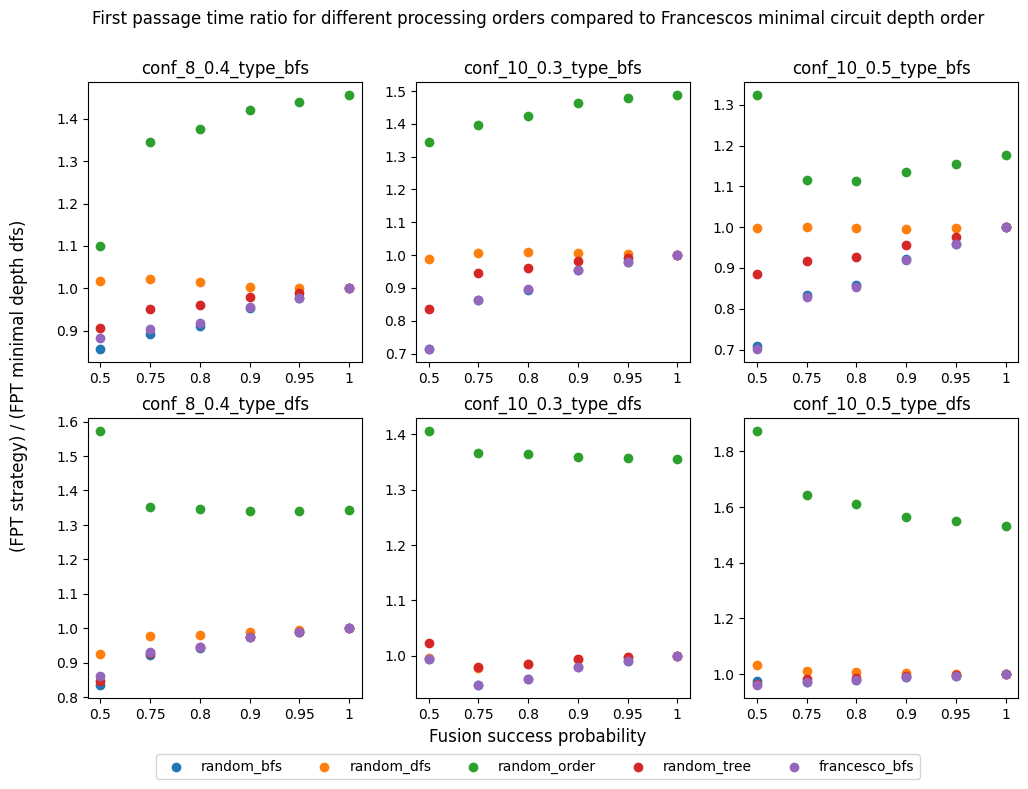

In [60]:
success_probabilities = ['0.5', '0.75', '0.8', '0.9','0.95','1'] #0.1 omitted
configurations = [['conf_8_0.4_type_bfs','conf_8_0.4_type_dfs'],['conf_10_0.3_type_bfs','conf_10_0.3_type_dfs'],['conf_10_0.5_type_bfs','conf_10_0.5_type_dfs']] #'conf_8_0.4_type_bfs','conf_8_0.4_type_dfs', 'conf_10_0.3_type_bfs','conf_10_0.3_type_dfs', 'conf_11_0.1_type_bfs','conf_11_0.1_type_dfs'
fig, axs = plt.subplots(2,3, figsize=(12,8))

for idx, (conf_bfs, conf_dfs) in enumerate(configurations):
    
    dfs_first_passage_times = []
    for prob in success_probabilities:
        entries = [francesco_dfs[prob][conf_bfs+'_sample_'+str(i)] for i in range(0,5)]

        dfs_first_passage_times.append(sum(entries)/len(entries))
        
    for df in [random_bfs, random_dfs, random_order, random_tree, francesco_bfs]: 
        first_passage_times = []
        for prob in success_probabilities:
            try:
                entries = [df[prob][conf_bfs+'_sample_'+str(i)] for i in range(0,5)]
            except:
                import pdb
                pdb.set_trace()
            first_passage_times.append(sum(entries)/len(entries))
        if [x for x in globals() if globals()[x] is df][0] == "df":
            plot = axs[0][idx].scatter(success_probabilities,[first_passage_times[i]/dfs_first_passage_times[i] for i in range(0,len(success_probabilities))], label="random_order")
        else:
            plot = axs[0][idx].scatter(success_probabilities,[first_passage_times[i]/dfs_first_passage_times[i] for i in range(0,len(success_probabilities))], label=[x for x in globals() if globals()[x] is df][0])
    axs[0][idx].set_title(conf_bfs)
#     axs[0][idx].axhline(y=1, color='black', linestyle='-.')
    
    dfs_first_passage_times = []
    for prob in success_probabilities:
        entries = [francesco_dfs[prob][conf_dfs+'_sample_'+str(i)] for i in range(0,5)]
        dfs_first_passage_times.append(sum(entries)/len(entries))
        
    for df in [random_bfs, random_dfs, random_order, random_tree, francesco_bfs]:
        first_passage_times = []
        for prob in success_probabilities:
            entries = [df[prob][conf_dfs+'_sample_'+str(i)] for i in range(0,5)]
            first_passage_times.append(sum(entries)/len(entries))
        
        if [x for x in globals() if globals()[x] is df][0] == "df":
            plot = axs[1][idx].scatter(success_probabilities,[first_passage_times[i]/dfs_first_passage_times[i] for i in range(0,len(success_probabilities))], label="random_order")
        else:
            plot = axs[1][idx].scatter(success_probabilities,[first_passage_times[i]/dfs_first_passage_times[i] for i in range(0,len(success_probabilities))], label=[x for x in globals() if globals()[x] is df][0])
    axs[1][idx].set_title(conf_dfs)
#     axs[1][idx].axhline(y=1, color='black', linestyle='-.')

handles, labels = axs[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(-0.5, 0., 2, 0.2), ncols=5)

fig.supxlabel('Fusion success probability',y=0.05)
fig.supylabel('(FPT strategy) / (FPT minimal depth dfs)',x=0.06)
fig.suptitle('First passage time ratio for different processing orders compared to Francescos minimal circuit depth order',y=0.97)


In [54]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import pandas as pd\nimport matplotlib.pyplot as plt',
  "randoms_bfs = pd.read_csv('../evaluation/bfs-vs-dfs-bfs-random-order.csv')\nrandoms_bfs.set_index('Unnamed: 0', inplace=True)\nrandoms_dfs = pd.read_csv('../evaluation/bfs-vs-dfs-dfs-random-order.csv')\nrandoms_dfs.set_index('Unnamed: 0', inplace=True)\nrandoms_tree = pd.read_csv('../evaluation/bfs-vs-dfs-random-order.csv')\nrandoms_tree.set_index('Unnamed: 0', inplace=True)\nfrancesco_dfs = pd.read_csv('../evaluation/bfs-vs-dfs.csv')\nfrancesco_dfs.set_index('Unnamed: 0', inplace=True)\nfrancesco_bfs = pd.read_csv('../evaluation/bfs-vs-dfs-bfs-order.csv')\nfrancesco_bfs.set_index('Unnamed: 0', inplace=True)",
  "success_probabilities = ['0.5', '0.75', '